In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json
/kaggle/input/arc-prize-2024/sample_submission.json
/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json
/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json


In [2]:
import json

def load_json(filepath):
    with open(filepath, 'r') as file:
        return json.load(file)

#load the data
training_solutions = load_json('/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json')
evaluation_solutions = load_json('/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json')
training_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json')
evaluation_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json')
test_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json')
sample_submission = load_json('/kaggle/input/arc-prize-2024/sample_submission.json')

In [3]:
def inspect_data(data, num_samples=1):
    for key, value in list(data.items())[:num_samples]:
        print(f"Key: {key}")
        print(f"Sample Data: {value}\n")
        
print("Training Solutions:")
inspect_data(training_solutions)

print("Training Challenges:")
inspect_data(training_challenges)

print("Evaluation Solutions:")
inspect_data(evaluation_solutions)

print("Evaluation Challenges:")
inspect_data(evaluation_challenges)

print("Test Challenges:")
inspect_data(test_challenges)

print("Sample submission:")
inspect_data(sample_submission)

Training Solutions:
Key: 007bbfb7
Sample Data: [[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]]

Training Challenges:
Key: 007bbfb7
Sample Data: {'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}], 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], 'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7]]}, {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]], 'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 4, 0, 0,

In [4]:
sample_key = list(training_solutions.keys())[0]
print(f"Sample Key: {sample_key}")
print("Sample Data:", training_solutions[sample_key])

Sample Key: 007bbfb7
Sample Data: [[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]]


In [5]:
#compute the mean, standard deviation, minimum, and maximum values of the data
sample_data = training_solutions[sample_key]

#convert to numpy array
data_array = np.array(sample_data)

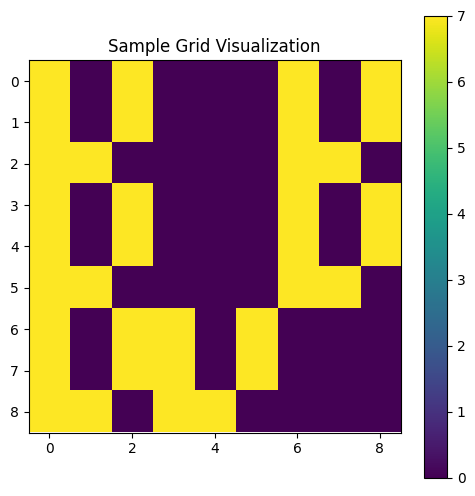

Grid Summary:
Mean Value: 3.11
Standard Deviation: 3.48
Minimum Value: 0
Maximum Value: 7

Frequency Distribution:
Value 0: 45 occurrences
Value 7: 36 occurrences


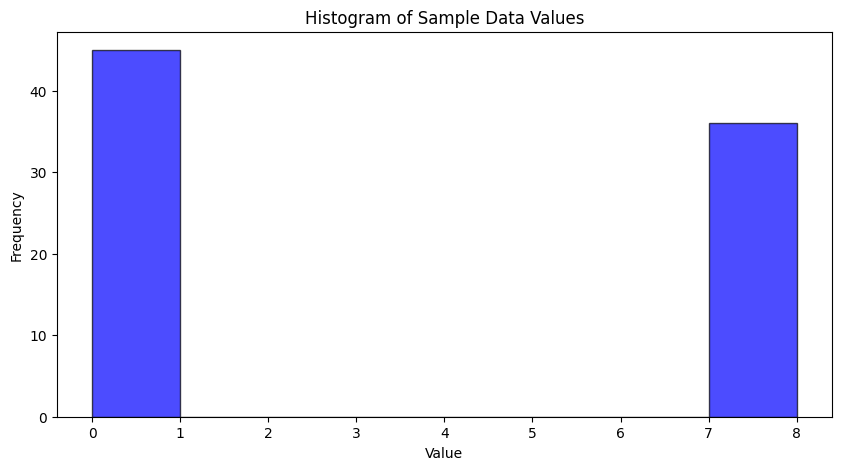

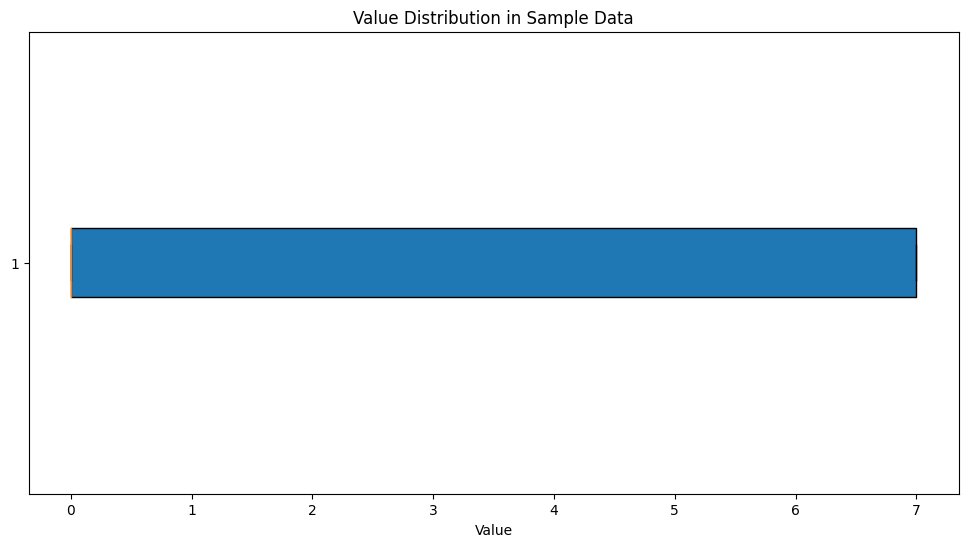

Histogram Summary:
Mean Value: 3.11
Median Value: 0.00
Minimum Value: 0
Maximum Value: 7

Frequency Distribution:
Value 0: 45 occurrences
Value 7: 36 occurrences
Boxplot Summary:
Median Value: 0.00
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 7.00
Interquartile Range (IQR): 7.00
Minimum Value: 0
Maximum Value: 7
Number of Outliers: 0


In [6]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_grid(data, title="Grid Visualization"):
    #remove any singleton dimensions
    data_squeezed = np.squeeze(data)
    plt.figure(figsize=(6, 6))
    plt.imshow(data_squeezed, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

def summarize_grid(data):
    #calculate basic statistics
    mean = np.mean(data)
    std_dev = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    
    #frequency distribution
    flat_data = data.flatten()
    freq_dist = Counter(flat_data)
    
    return mean, std_dev, min_val, max_val, freq_dist

def print_summary(mean, std_dev, min_val, max_val, freq_dist):
    print("Grid Summary:")
    print(f"Mean Value: {mean:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print("\nFrequency Distribution:")
    for value, count in sorted(freq_dist.items()):
        print(f"Value {value}: {count} occurrences")

def plot_histogram(data, title="Histogram of Data Values"):
    plt.figure(figsize=(10, 5))
    plt.hist(data.flatten(), bins=range(int(np.min(data)), int(np.max(data)) + 2), color='blue', alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

def plot_value_distribution(data, title="Value Distribution"):
    plt.figure(figsize=(12, 6))
    plt.boxplot(data.flatten(), vert=False, patch_artist=True)
    plt.title(title)
    plt.xlabel('Value')
    plt.show()

def summarize_histogram(data):
    flat_data = data.flatten()
    mean = np.mean(flat_data)
    median = np.median(flat_data)
    min_val = np.min(flat_data)
    max_val = np.max(flat_data)
    unique, counts = np.unique(flat_data, return_counts=True)
    freq_dist = dict(zip(unique, counts))
    
    print("Histogram Summary:")
    print(f"Mean Value: {mean:.2f}")
    print(f"Median Value: {median:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print("\nFrequency Distribution:")
    for value, count in sorted(freq_dist.items()):
        print(f"Value {value}: {count} occurrences")

def summarize_boxplot(data):
    flat_data = data.flatten()
    median = np.median(flat_data)
    q1 = np.percentile(flat_data, 25)
    q3 = np.percentile(flat_data, 75)
    iqr = q3 - q1
    min_val = np.min(flat_data)
    max_val = np.max(flat_data)
    outliers = flat_data[(flat_data < (q1 - 1.5 * iqr)) | (flat_data > (q3 + 1.5 * iqr))]

    print("Boxplot Summary:")
    print(f"Median Value: {median:.2f}")
    print(f"1st Quartile (Q1): {q1:.2f}")
    print(f"3rd Quartile (Q3): {q3:.2f}")
    print(f"Interquartile Range (IQR): {iqr:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print(f"Number of Outliers: {len(outliers)}")
    if len(outliers) > 0:
        print("Outlier Values:", np.unique(outliers))

#plot the grid
plot_grid(data_array, title="Sample Grid Visualization")

#get statistics and frequency distribution
mean, std_dev, min_val, max_val, freq_dist = summarize_grid(data_array)

#print textual summary
print_summary(mean, std_dev, min_val, max_val, freq_dist)

#plot histogram and boxplot
plot_histogram(data_array, title="Histogram of Sample Data Values")
plot_value_distribution(data_array, title="Value Distribution in Sample Data")

#print textual summaries for histogram and boxplot
summarize_histogram(data_array)
summarize_boxplot(data_array)